# Perceptron

In [41]:
import numpy as np

class Perceptron:
    # eta: learning rate
    # n_iter: number of epochs
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        # random number generator using np.random.RandomState class
        # used to initialize the weights
        rgen = np.random.RandomState(self.random_state)
        
        # generate random numbers from a normal (Gaussian distribution)
        # distribution with mean 0 and standard deviation 0.01
        # size: output shape of the array, equal to number of features in X
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [27]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

df = pd.read_csv(os.path.join(path, 'Iris.csv'), encoding='utf-8', index_col=0)
df.tail()

Path to dataset files: /Users/hieu/.cache/kagglehub/datasets/uciml/iris/versions/2


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


Extract text labels to integer labels as targets, 1st and 3rd feature columns (sepal length and petal length) as features.

In [32]:
df_setosa = df[df['Species'] == 'Iris-setosa']
df_versicolor = df[df['Species'] == 'Iris-versicolor']

print(df_setosa.head())
print(df_versicolor.head())

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
Id                                                                           
51            7.0           3.2            4.7           1.4  Iris-versicolor
52            6.4           3.2            4.5           1.5  Iris-versicolor
53            6.9           3.1            4.9           1.5  Iris-versicolor
54            5.5           2.3            4.0           1.3  Iris-versicolor
55            

Text labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


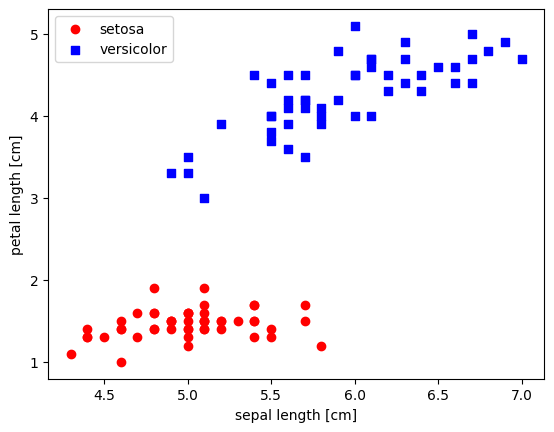

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# extract text labes
y = df.iloc[:, 4].values
print('Text labels:', np.unique(y))

# convert to integer labels
y = np.where(y == 'Iris-setosa', 0, 1)

# extract features (1st and 3rd column)
X = df.iloc[:, [0, 2]].values

df_setosa = df[df['Species'] == 'Iris-setosa']
df_versicolor = df[df['Species'] == 'Iris-versicolor']

plt.scatter(df_setosa['SepalLengthCm'], df_setosa['PetalLengthCm'], color='red', marker='o', label='setosa')
plt.scatter(df_versicolor['SepalLengthCm'], df_versicolor['PetalLengthCm'], color='blue', marker='s', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [38]:
print(len(X), len(y))

150 150


In [39]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (120, 2)
Test set shape: (30, 2)


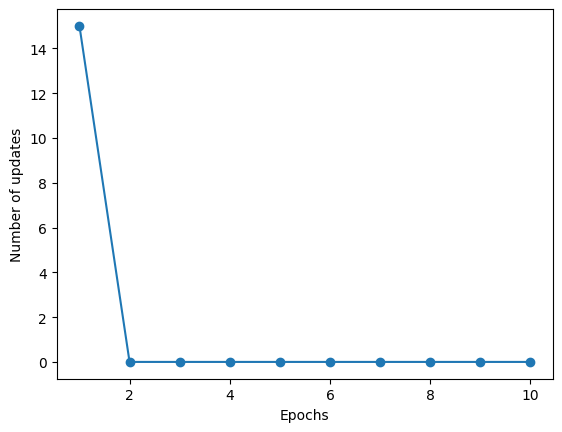

In [42]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_train, y_train)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Perceptron converged after 2 epochs.

In [48]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for i, j in enumerate(np.unique(y)):
        plt.scatter(X[y == j, 0], X[y == j, 1], alpha=0.8, cmap=cmap, marker=markers[i], label=j, c=colors[i])


/var/folders/v6/fmnfcvjs7y54r0___bhdm7fm0000gs/T/ipykernel_37666/3655313626.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == j, 0], X[y == j, 1], alpha=0.8, cmap=cmap, marker=markers[i], label=j, c=colors[i])


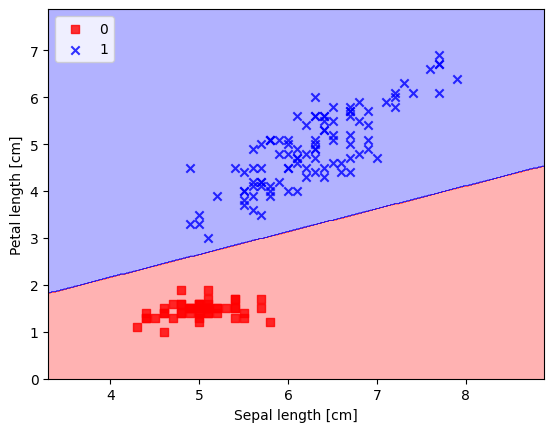

In [49]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Adaptive linear neurons